### Importing Libraries

In [1]:
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from imblearn.combine import SMOTEENN

#### Reading csv

In [2]:
df=pd.read_csv("tel_churn.csv")
df.head()

,Unnamed: 0,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,0,29.85,29.85,0,0,1,0,0,1,...,0,1,0,1,0,0,0,0,0,0
1,1,0,56.95,1889.50,0,1,0,0,1,0,...,0,0,0,0,1,0,1,0,0,0
2,2,0,53.85,108.15,1,1,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0
3,3,0,42.30,1840.75,0,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,4,0,70.70,151.65,1,0,0,0,1,0,...,0,1,0,1,0,0,0,0,0,0


In [3]:
df.shape

(7032, 36)

In [4]:
df=df.drop('Unnamed: 0',axis=1)

In [5]:
x=df.drop('Churn',axis=1)
x

,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,...,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,1,0,0,1,0,0,...,0,1,0,1,0,0,0,0,0,0
1,0,56.95,1889.50,1,0,0,1,0,0,0,...,0,0,0,0,1,0,1,0,0,0
2,0,53.85,108.15,1,0,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,0
3,0,42.30,1840.75,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,0,0,0,1,0,0,1,...,0,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,84.80,1990.50,1,1,1,1,0,1,0,...,0,1,0,0,1,1,0,0,0,0
7028,0,103.20,7362.90,0,1,1,1,0,1,1,...,0,1,1,0,0,0,0,0,0,1
7029,0,29.60,346.45,0,1,1,0,1,0,0,...,0,1,0,1,0,0,0,0,0,0
7030,1,74.40,306.60,1,1,0,1,0,1,1,...,0,1,0,0,1,0,0,0,0,0


In [6]:
y=df['Churn']
y

0       0
1       0
2       1
3       0
4       1
       ..
7027    0
7028    0
7029    0
7030    1
7031    0
Name: Churn, Length: 7032, dtype: int64

In [7]:
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score


* Hanling Imbalanced Dataset.

In [8]:
sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_resample(x,y)

In [9]:
x_train,x_test,y_train,y_test=train_test_split(X_resampled, y_resampled,test_size=0.2,random_state=100)

In [10]:
log_reg = LogisticRegression()

log_reg.fit(x_train,y_train)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [11]:
y_pred = log_reg.predict(x_test)

In [12]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.9240724762726489

In [13]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[513,  51],
       [ 37, 558]], dtype=int64)

In [14]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [15]:
# Breaking down the formula for Accuracy
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.9240724762726489

In [16]:
# Precison
Precision = true_positive/(true_positive+false_positive)
Precision

0.9095744680851063

In [17]:
# Recall
Recall = true_positive/(true_positive+false_negative)
Recall

0.9327272727272727

In [18]:
# F1 Score
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.9210053859964094

In [19]:
# Area Under Curve
auc = roc_auc_score(y_test, y_pred)
auc

0.9236947970677631

In [20]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

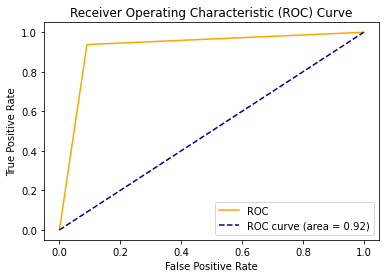

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

### Hyperparameter Tuning.

In [22]:
log_reg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [23]:

log_reg.get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

In [24]:
import numpy as np
np.logspace(-4, 4, 20)

array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04])

In [25]:
param_grid ={'penalty': ['l1', 'l2','elasticnet'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['liblinear','lbfgs', 'liblinear', 'sag', 'saga']}

In [26]:
from sklearn.model_selection import RandomizedSearchCV

In [27]:
log_reg_rscv= RandomizedSearchCV(log_reg, param_grid, cv = 5)

In [28]:
log_reg_rscv.fit(x_train,y_train)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'penalty': ['l1', 'l2', 'elasticnet'],
                                        'solver': ['liblinear', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']})

In [29]:
log_reg_rscv.best_params_

{'solver': 'lbfgs', 'penalty': 'l2', 'C': 545.5594781168514}

In [30]:
log_reg_rs = LogisticRegression(C=3792.690190732246,penalty= 'l1',solver= 'liblinear',verbose=1)

In [31]:
log_reg_rs.fit(x_train,y_train)

[LibLinear]

LogisticRegression(C=3792.690190732246, penalty='l1', solver='liblinear',
                   verbose=1)

In [32]:
y_pred1=log_reg_rs.predict(x_test)

In [33]:
accuracy_score(y_test,y_pred1)

0.9275237273511648

##### Train Test Split

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=200)

#### Decision Tree Classifier

In [35]:
model_dt=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)

In [36]:
model_dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [37]:
y_pred=model_dt.predict(x_test)
y_pred

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [38]:
model_dt.score(x_test,y_test)

0.7818052594171997

In [39]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1023
           1       0.64      0.46      0.54       384

    accuracy                           0.78      1407
   macro avg       0.73      0.68      0.70      1407
weighted avg       0.77      0.78      0.77      1407



###### As you can see that the accuracy is quite low, and as it's an imbalanced dataset, we shouldn't consider Accuracy as our metrics to measure the model, as Accuracy is cursed in imbalanced datasets.

###### Hence, we need to check recall, precision & f1 score for the minority class, and it's quite evident that the precision, recall & f1 score is too low for Class 1, i.e. churned customers.

###### Hence, moving ahead to call SMOTEENN (UpSampling + ENN)

In [40]:
sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_resample(x,y)

In [41]:
xr_train,xr_test,yr_train,yr_test=train_test_split(X_resampled, y_resampled,test_size=0.2)

In [42]:
model_dt_smote=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)

In [43]:
model_dt_smote.fit(xr_train,yr_train)
yr_predict = model_dt_smote.predict(xr_test)
model_score_r = model_dt_smote.score(xr_test, yr_test)
print(model_score_r)
print(metrics.classification_report(yr_test, yr_predict))

0.9012987012987013
              precision    recall  f1-score   support

           0       0.92      0.87      0.89       542
           1       0.89      0.93      0.91       613

    accuracy                           0.90      1155
   macro avg       0.90      0.90      0.90      1155
weighted avg       0.90      0.90      0.90      1155



In [44]:
print(metrics.confusion_matrix(yr_test, yr_predict))

[[471  71]
 [ 43 570]]


###### Now we can see quite better results, i.e. Accuracy: 90%, and a very good recall, precision & f1 score for minority class.

###### Let's try with some other classifier.

#### Random Forest Classifier

In [45]:
from sklearn.ensemble import RandomForestClassifier

In [46]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=300)

In [47]:
model_rf=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)

In [48]:
model_rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [49]:
y_pred=model_rf.predict(x_test)

In [50]:
model_rf.score(x_test,y_test)

0.8059701492537313

In [51]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.83      0.94      0.88      1048
           1       0.70      0.43      0.53       359

    accuracy                           0.81      1407
   macro avg       0.76      0.68      0.70      1407
weighted avg       0.79      0.81      0.79      1407



In [52]:
sm = SMOTEENN()
X_resampled1, y_resampled1 = sm.fit_resample(x,y)

In [53]:
xr_train1,xr_test1,yr_train1,yr_test1=train_test_split(X_resampled1, y_resampled1,test_size=0.2,random_state=400)

In [54]:
model_rf_smote=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)

In [55]:
model_rf_smote.fit(xr_train1,yr_train1)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [56]:
yr_predict1 = model_rf_smote.predict(xr_test1)

In [57]:
model_score_r1 = model_rf_smote.score(xr_test1, yr_test1)

In [58]:
print(model_score_r1)
print(metrics.classification_report(yr_test1, yr_predict1))

0.9238754325259516
              precision    recall  f1-score   support

           0       0.95      0.88      0.91       530
           1       0.91      0.96      0.93       626

    accuracy                           0.92      1156
   macro avg       0.93      0.92      0.92      1156
weighted avg       0.92      0.92      0.92      1156



In [59]:
print(metrics.confusion_matrix(yr_test1, yr_predict1))

[[469  61]
 [ 27 599]]


###### With RF Classifier, also we are able to get quite good results, infact better than Decision Tree and Logistic Regression.


In [60]:
from sklearn.model_selection import RandomizedSearchCV

In [61]:
grid_param = {
    "n_estimators" : [90,100,115,130],
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,20,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'max_features' : ['auto','log2']
}

In [62]:
random_search=RandomizedSearchCV(model_rf,grid_param,cv=5,n_jobs =-1,verbose = 1)

In [63]:
random_search.fit(xr_train,yr_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(max_depth=6,
                                                    min_samples_leaf=8,
                                                    random_state=100),
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': range(2, 20),
                                        'max_features': ['auto', 'log2'],
                                        'min_samples_leaf': range(1, 10),
                                        'min_samples_split': range(2, 10),
                                        'n_estimators': [90, 100, 115, 130]},
                   verbose=1)

In [64]:
#let's see the best parameters as per our grid search
random_search.best_params_

{'n_estimators': 90,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 16,
 'criterion': 'entropy'}

In [65]:
model_rf1 = RandomForestClassifier(criterion= 'entropy',
 max_features = 'auto',
 min_samples_leaf = 2,
 min_samples_split= 7,
 n_estimators = 130,random_state=6)


In [66]:
model_rf1.fit(xr_train,yr_train)

RandomForestClassifier(criterion='entropy', min_samples_leaf=2,
                       min_samples_split=7, n_estimators=130, random_state=6)

In [67]:
model_rf1.score(xr_test,yr_test)

0.9437229437229437

#### Pickling the model

In [68]:
import pickle

In [69]:
filename = 'Churn_model.sav'

In [70]:
pickle.dump(model_rf1, open(filename, 'wb'))

In [71]:
load_model = pickle.load(open(filename, 'rb'))